In [1]:
import os
import pandas as pd
path = r'/content/drive/MyDrive/Аспирантура/DATA' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_1.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


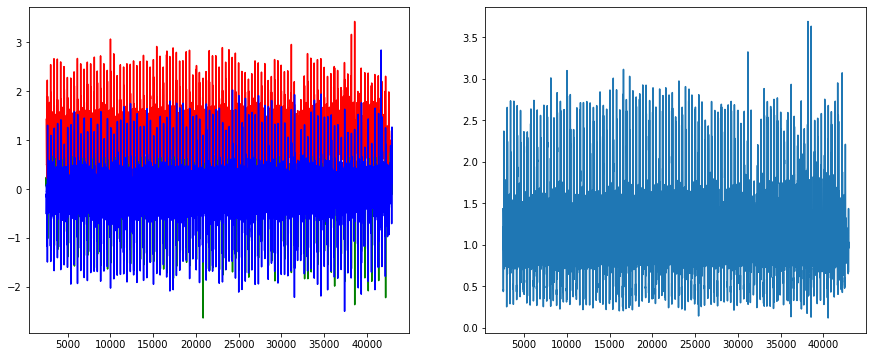

 АМПЛИТУДА: 3.5760860772671528

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_2.csv


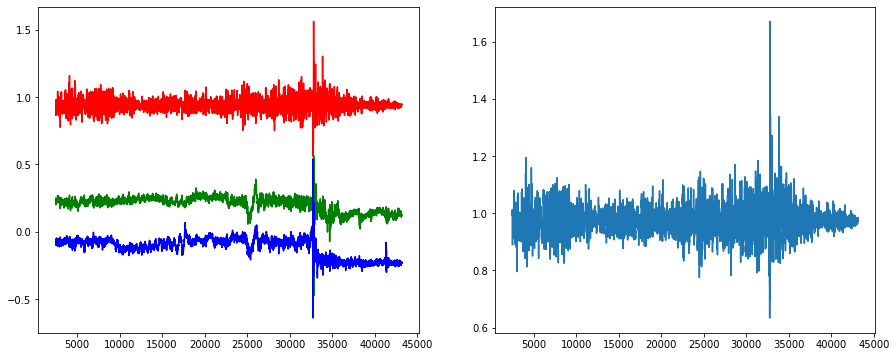

 АМПЛИТУДА: 1.0373227556571465

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_1.csv


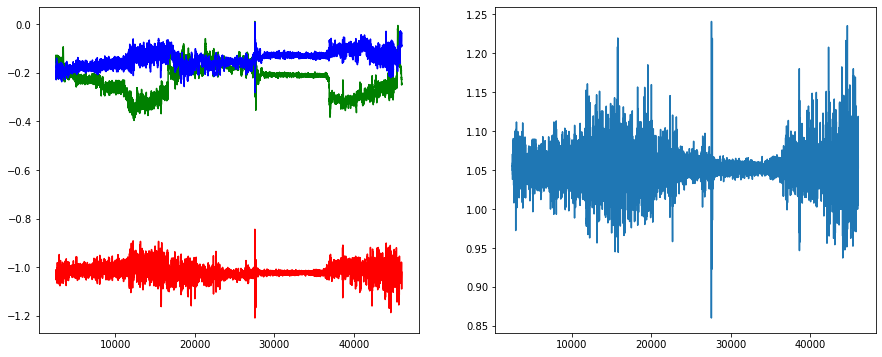

 АМПЛИТУДА: 0.3806515017895796

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_1.csv


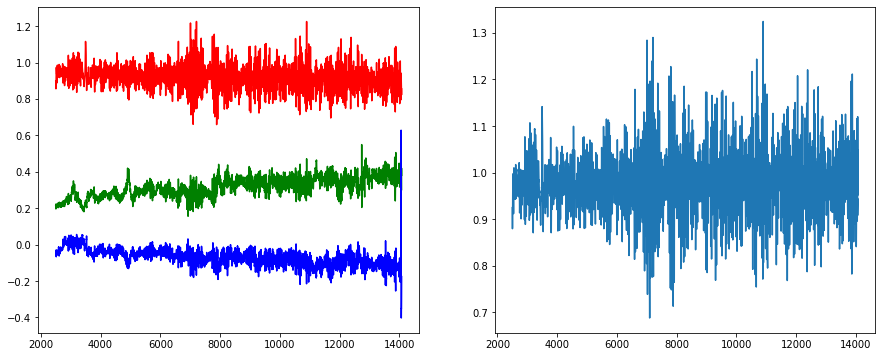

 АМПЛИТУДА: 0.6359523128551742

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_3.csv


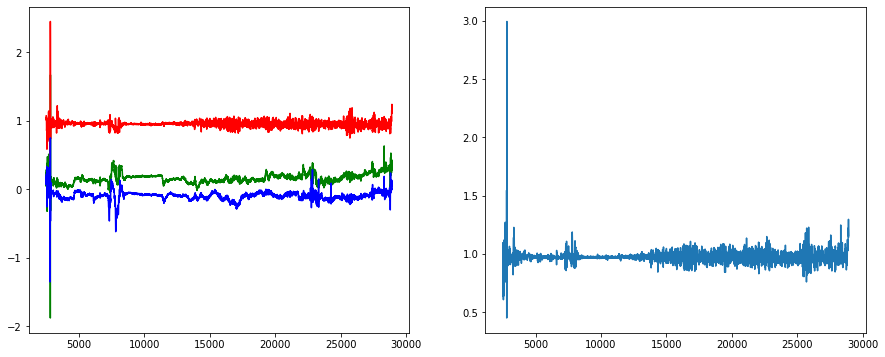

 АМПЛИТУДА: 2.546045971965683

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_2.csv


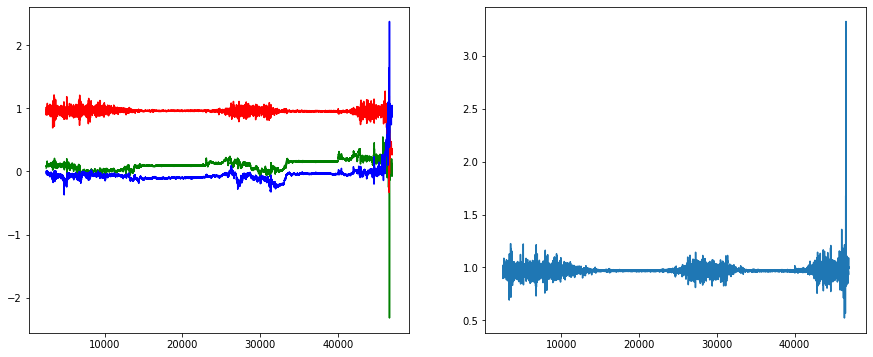

 АМПЛИТУДА: 2.7998837182510226

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_2.csv


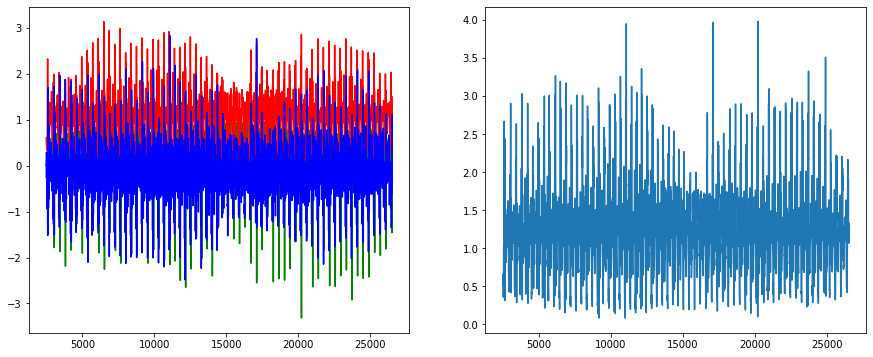

 АМПЛИТУДА: 3.8963406541453303

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_3.csv


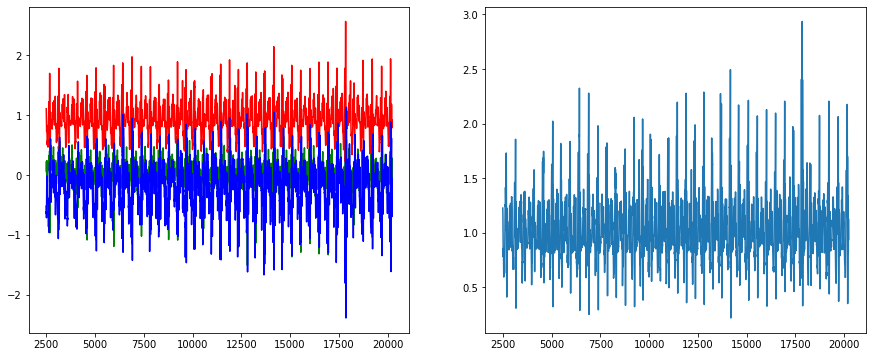

 АМПЛИТУДА: 2.714704063755221

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_1.csv


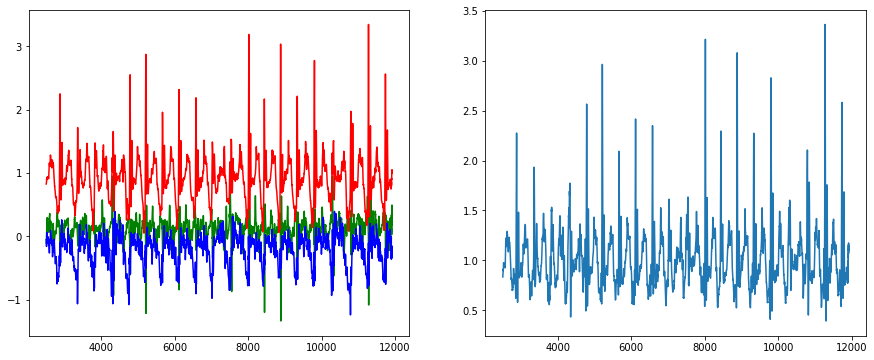

 АМПЛИТУДА: 2.9697282903472297

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_4.csv


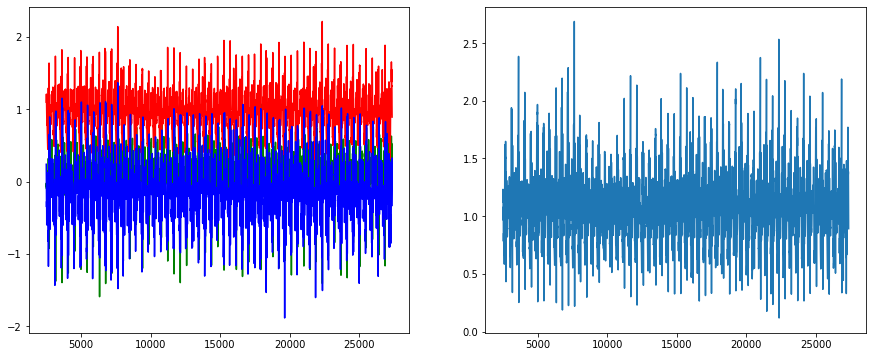

 АМПЛИТУДА: 2.569118121097181

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_5.csv


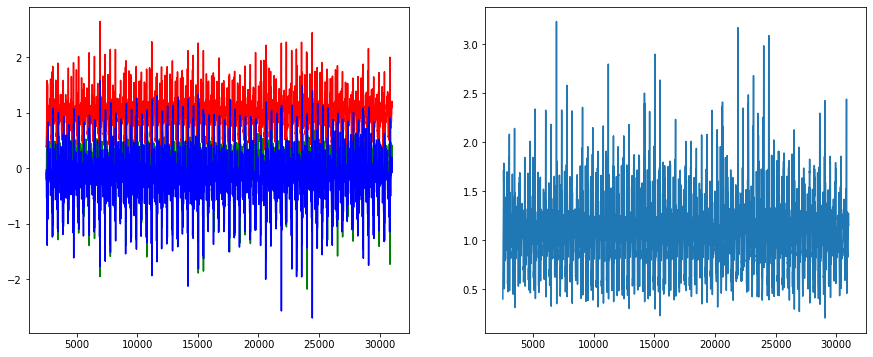

 АМПЛИТУДА: 3.024425350988732

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_2.csv


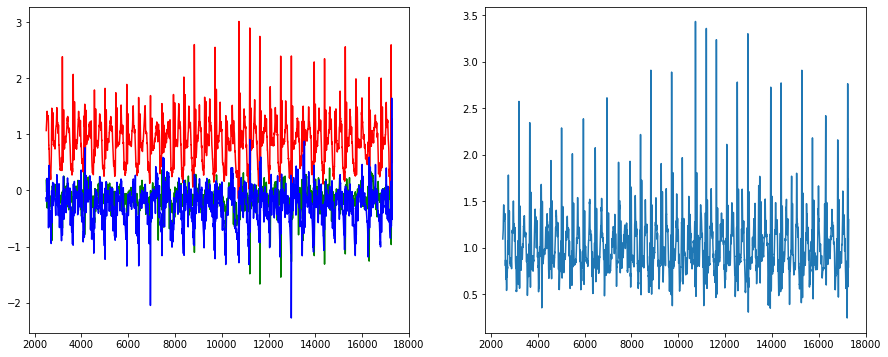

 АМПЛИТУДА: 3.1906005910940687

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_3.csv


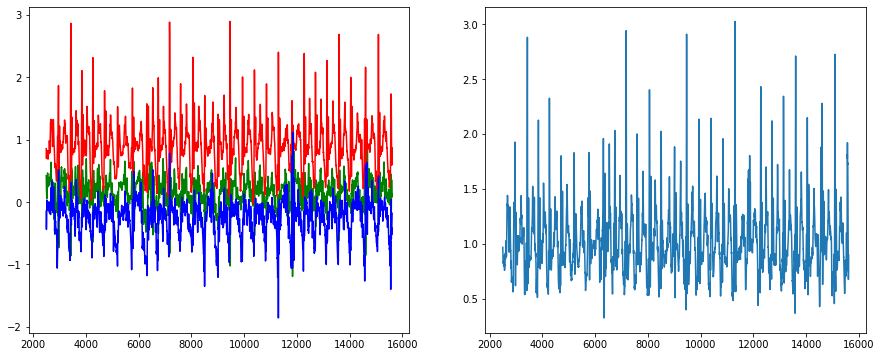

 АМПЛИТУДА: 2.70136718310036



In [4]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
# обрезаем начало и конец трека
    if a == -1:
        st = 2500
    else:
        st = a
            
    if b == -1:
        end = -2500
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))


    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)

    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
        

    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    ax2.plot(Acc)
    plt.show()


    print(' АМПЛИТУДА:', Acc.max()-Acc.min())
    print()
    
    return df


for df, target in zip(Data,Target):
    process_data(df, name=target)